   Problem Statement

Can we predict ED admission outcomes using patient demographics, triage information, and clinical indicators at the time of arrival?

Accurate predictions can help hospitals:

Allocate beds and staff proactively

Reduce overcrowding

Improve patient experience and operational efficiency

   Solution 

Emergency Departments (EDs) often face overcrowding, leading to longer waiting times, resource strain, and reduced quality of care. This project aims to predict whether a patient visiting the Emergency Department will be admitted or discharged, using real-world hospital data and supervised machine learning techniques




In [1]:
# import libiary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load iran dataset 
df = pd.read_csv("./data/ED_admission.csv")
df

,triage_code,PatientCode,DischargeFromED,Foreigners,gender,age,marital_Status,ResidentDate_year,ResidentDate_month,ResidentDate_day,...,DischargeDate_hour,StatusOnDischarge,KindRef,IsGlobal,AccompainerRelation_id,ResidentDay,service_count_action,service_count_instrument,service_count_lab,service_count_graphy
0,13960101008,9600008,0,No,Female,75.0,2.0,2017,3,21,...,0,3,5,0.0,2.0,10.0,0,0,0,0
1,13960101009,9600009,0,No,Male,41.0,2.0,2017,3,21,...,0,2,6,0.0,3.0,2.0,0,0,0,0
2,13960101010,9600010,0,No,Female,71.0,2.0,2017,3,21,...,0,2,6,0.0,2.0,0.0,0,0,0,0
3,13960101011,9600011,0,No,Male,77.0,2.0,2017,3,21,...,0,3,6,0.0,2.0,9.0,0,0,0,0
4,13960101012,9600012,0,No,Male,38.0,2.0,2017,3,21,...,0,2,6,0.0,3.0,1.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143275,14001229114,140047327,1,No,Female,56.0,2.0,2022,3,20,...,0,2,3,0.0,3.0,4.0,0,0,0,0
143276,14001229115,140047328,1,No,Female,59.0,2.0,2022,3,20,...,0,2,4,0.0,2.0,1.0,0,0,0,0
143277,14001229117,140047329,1,No,Female,78.0,4.0,2022,3,20,...,0,3,4,0.0,3.0,17.0,0,0,0,0
143278,14001229118,140047330,1,No,Male,69.0,2.0,2022,3,20,...,0,2,4,0.0,2.0,4.0,0,0,0,0


In [3]:
# data information
df.shape

# 143280 ---> Rows
# 26 ----> Columns

(143280, 26)

In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 143280 entries, 0 to 143279
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   triage_code               143280 non-null  int64  
 1   PatientCode               143280 non-null  int64  
 2   DischargeFromED           143280 non-null  int64  
 3   Foreigners                143280 non-null  str    
 4   gender                    143279 non-null  str    
 5   age                       143279 non-null  float64
 6   marital_Status            143261 non-null  float64
 7   ResidentDate_year         143280 non-null  int64  
 8   ResidentDate_month        143280 non-null  int64  
 9   ResidentDate_day          143280 non-null  int64  
 10  ResidentDate_weekday      143280 non-null  int64  
 11  ResidentDate_hour         143280 non-null  int64  
 12  DischargeDate_year        143280 non-null  int64  
 13  DischargeDate_month       143280 non-null  int64  
 14 

In [5]:
# data  describe

df.describe()

,triage_code,PatientCode,DischargeFromED,age,marital_Status,ResidentDate_year,ResidentDate_month,ResidentDate_day,ResidentDate_weekday,ResidentDate_hour,...,DischargeDate_hour,StatusOnDischarge,KindRef,IsGlobal,AccompainerRelation_id,ResidentDay,service_count_action,service_count_instrument,service_count_lab,service_count_graphy
count,1.432800e+05,1.432800e+05,143280.000000,143279.000000,143261.000000,143280.000000,143280.00000,143280.000000,143280.000000,143280.000000,...,143280.0,143280.000000,143280.000000,143279.000000,142490.000000,143279.000000,143280.0,143280.0,143280.0,143280.0
mean,1.397955e+10,3.436424e+07,0.504997,47.592439,1.742142,2019.093418,6.47447,15.749023,3.015271,13.472934,...,0.0,2.135490,4.246859,0.007684,4.225293,4.212076,0.0,0.0,0.0,0.0
std,1.413220e+07,5.097767e+07,0.499977,22.389465,0.550985,1.473407,3.32025,8.806438,2.002491,6.979224,...,0.0,0.653669,1.520915,0.087323,2.720352,9.089540,0.0,0.0,0.0,0.0
min,1.396010e+10,9.600008e+06,0.000000,0.000000,0.000000,2017.000000,1.00000,1.000000,0.000000,0.000000,...,0.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0
25%,1.397023e+10,9.708525e+06,0.000000,30.000000,1.000000,2018.000000,4.00000,8.000000,1.000000,9.000000,...,0.0,2.000000,3.000000,0.000000,2.000000,0.000000,0.0,0.0,0.0,0.0
50%,1.398042e+10,9.820470e+06,1.000000,47.000000,2.000000,2019.000000,7.00000,16.000000,3.000000,15.000000,...,0.0,2.000000,3.000000,0.000000,3.000000,1.000000,0.0,0.0,0.0,0.0
75%,1.399063e+10,9.924218e+06,1.000000,66.000000,2.000000,2020.000000,9.00000,23.000000,5.000000,19.000000,...,0.0,2.000000,6.000000,0.000000,6.000000,5.000000,0.0,0.0,0.0,0.0
max,1.400123e+10,1.400473e+08,1.000000,112.000000,5.000000,2022.000000,12.00000,31.000000,6.000000,23.000000,...,0.0,10.000000,7.000000,1.000000,10.000000,502.000000,0.0,0.0,0.0,0.0


- Dataset contains ~143k patient records
- Mix of categorical and numerical features
- Target variable: DischargeFromED


In [6]:
df.columns

Index(['triage_code', 'PatientCode', 'DischargeFromED', 'Foreigners', 'gender',
       'age', 'marital_Status', 'ResidentDate_year', 'ResidentDate_month',
       'ResidentDate_day', 'ResidentDate_weekday', 'ResidentDate_hour',
       'DischargeDate_year', 'DischargeDate_month', 'DischargeDate_day',
       'DischargeDate_weekday', 'DischargeDate_hour', 'StatusOnDischarge',
       'KindRef', 'IsGlobal', 'AccompainerRelation_id', 'ResidentDay',
       'service_count_action', 'service_count_instrument', 'service_count_lab',
       'service_count_graphy'],
      dtype='str')

In [7]:
# unwanted columns  [triage_code ,'PatientCode' ,'DischargeDate_year', 'DischargeDate_month', 'DischargeDate_day','DischargeDate_weekday', 'DischargeDate_hour', 'StatusOnDischarge',]

df = df.drop(columns=['triage_code','PatientCode' ,'DischargeDate_year', 'DischargeDate_month', 'DischargeDate_day','DischargeDate_weekday', 'DischargeDate_hour', 'StatusOnDischarge',])


In [8]:
df.head(4)

,DischargeFromED,Foreigners,gender,age,marital_Status,ResidentDate_year,ResidentDate_month,ResidentDate_day,ResidentDate_weekday,ResidentDate_hour,KindRef,IsGlobal,AccompainerRelation_id,ResidentDay,service_count_action,service_count_instrument,service_count_lab,service_count_graphy
0,0,No,Female,75.0,2.0,2017,3,21,2,2,5,0.0,2.0,10.0,0,0,0,0
1,0,No,Male,41.0,2.0,2017,3,21,2,2,6,0.0,3.0,2.0,0,0,0,0
2,0,No,Female,71.0,2.0,2017,3,21,2,2,6,0.0,2.0,0.0,0,0,0,0
3,0,No,Male,77.0,2.0,2017,3,21,2,2,6,0.0,2.0,9.0,0,0,0,0


In [9]:
df['Foreigners'].value_counts(dropna=False)


Foreigners
No     138092
Yes      5188
Name: count, dtype: int64

In [10]:
df.nunique()

DischargeFromED               2
Foreigners                    2
gender                        2
age                         111
marital_Status                6
ResidentDate_year             6
ResidentDate_month           12
ResidentDate_day             31
ResidentDate_weekday          7
ResidentDate_hour            24
KindRef                       7
IsGlobal                      2
AccompainerRelation_id       10
ResidentDay                 177
service_count_action          1
service_count_instrument      1
service_count_lab             1
service_count_graphy          1
dtype: int64

In [11]:
# remove unwanted columns like
# service_count_action             1
# service_count_instrument         1
# service_count_lab                1
#  service_count_graphy             1
# ResidentDate_day
# ResidentDate_year


df = df.drop(columns=['service_count_action' ,'service_count_instrument' ,'service_count_lab' ,'service_count_graphy' ])

In [12]:
df = df.drop(columns=['ResidentDate_day','ResidentDate_year'])

In [13]:
df.reset_index(drop=True , inplace=True)

In [14]:
df.head()

,DischargeFromED,Foreigners,gender,age,marital_Status,ResidentDate_month,ResidentDate_weekday,ResidentDate_hour,KindRef,IsGlobal,AccompainerRelation_id,ResidentDay
0,0,No,Female,75.0,2.0,3,2,2,5,0.0,2.0,10.0
1,0,No,Male,41.0,2.0,3,2,2,6,0.0,3.0,2.0
2,0,No,Female,71.0,2.0,3,2,2,6,0.0,2.0,0.0
3,0,No,Male,77.0,2.0,3,2,2,6,0.0,2.0,9.0
4,0,No,Male,38.0,2.0,3,2,2,6,0.0,3.0,1.0


In [15]:
df['AccompainerRelation_id'].value_counts()

AccompainerRelation_id
2.0     44800
4.0     21665
3.0     19260
9.0     13135
1.0     10017
6.0      9230
10.0     8054
5.0      7319
7.0      4805
8.0      4205
Name: count, dtype: int64

In [16]:
# checking data info on target columns 	DischargeFromED

df['DischargeFromED'].value_counts()

DischargeFromED
1    72356
0    70924
Name: count, dtype: int64

In [17]:
# data cleaning 
# check data type
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 143280 entries, 0 to 143279
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   DischargeFromED         143280 non-null  int64  
 1   Foreigners              143280 non-null  str    
 2   gender                  143279 non-null  str    
 3   age                     143279 non-null  float64
 4   marital_Status          143261 non-null  float64
 5   ResidentDate_month      143280 non-null  int64  
 6   ResidentDate_weekday    143280 non-null  int64  
 7   ResidentDate_hour       143280 non-null  int64  
 8   KindRef                 143280 non-null  int64  
 9   IsGlobal                143279 non-null  float64
 10  AccompainerRelation_id  142490 non-null  float64
 11  ResidentDay             143279 non-null  float64
dtypes: float64(5), int64(5), str(2)
memory usage: 13.1 MB


In [18]:
# missing value analysis
df.isna().sum()

DischargeFromED             0
Foreigners                  0
gender                      1
age                         1
marital_Status             19
ResidentDate_month          0
ResidentDate_weekday        0
ResidentDate_hour           0
KindRef                     0
IsGlobal                    1
AccompainerRelation_id    790
ResidentDay                 1
dtype: int64

- Minor missing values in age, gender,Foreigners, marital_Status
- AccompainerRelation_id has moderate missingness


In [19]:
# change or map Foreigners 

df['Foreigners'].value_counts(dropna=False)
df['Foreigners'] = df['Foreigners'].map({'Yes': 1, 'No': 0}) 

In [20]:
# encode gender into yes and no 
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})


In [21]:
# Handle Null values 
df["age"] = df["age"].fillna(df["age"].median(), inplace=True)
df["gender"] = df["gender"].fillna(df["gender"].mode()[0], inplace=True)
df["marital_Status"] = df["marital_Status"].fillna(df["marital_Status"].mode()[0], inplace=True)
df["AccompainerRelation_id"] = df["AccompainerRelation_id"].fillna(df["AccompainerRelation_id"].mode()[0], inplace=True)
df['IsGlobal'] = df['IsGlobal'].fillna(df['IsGlobal'].mode()[0], inplace=True)
df['Foreigners'] = df['Foreigners'].fillna(df['Foreigners'].mode()[0] , inplace = True)


In [22]:
df['ResidentDay'] = df['ResidentDay'].fillna(df['ResidentDay'].median(), inplace=True)

In [23]:
df.isna().sum()

DischargeFromED           0
Foreigners                0
gender                    0
age                       0
marital_Status            0
ResidentDate_month        0
ResidentDate_weekday      0
ResidentDate_hour         0
KindRef                   0
IsGlobal                  0
AccompainerRelation_id    0
ResidentDay               0
dtype: int64

In [24]:
# checking duplicated 
df.duplicated().value_counts()

False    142629
True        651
Name: count, dtype: int64

In [25]:
df.drop_duplicates(inplace=True)


In [26]:
df.duplicated().sum()

np.int64(0)

In [27]:
df.head()

,DischargeFromED,Foreigners,gender,age,marital_Status,ResidentDate_month,ResidentDate_weekday,ResidentDate_hour,KindRef,IsGlobal,AccompainerRelation_id,ResidentDay
0,0,0,0.0,75.0,2.0,3,2,2,5,0.0,2.0,10.0
1,0,0,1.0,41.0,2.0,3,2,2,6,0.0,3.0,2.0
2,0,0,0.0,71.0,2.0,3,2,2,6,0.0,2.0,0.0
3,0,0,1.0,77.0,2.0,3,2,2,6,0.0,2.0,9.0
4,0,0,1.0,38.0,2.0,3,2,2,6,0.0,3.0,1.0


In [28]:
# Feature Selection 
df.drop(
    columns=[
        "ResidentDate_month"
    ],
    inplace=True
)


- Year/day/month removed to avoid noise
- Retained hour and weekday which capture hospital load patterns


WHAT WE KNOW ABOUT FROM THESE DATA 

AGE vs DISCHARGE PROBABILITY

In [29]:
df.groupby(pd.cut(df["age"], [0,18,40,60,100]))["DischargeFromED"].mean()

age
(0, 18]      0.740110
(18, 40]     0.611394
(40, 60]     0.462211
(60, 100]    0.359115
Name: DischargeFromED, dtype: float64

Insight
Elderly patients stay longer
Young adults discharged faster
Use Case
Better bed allocation
enior-focused ED resources

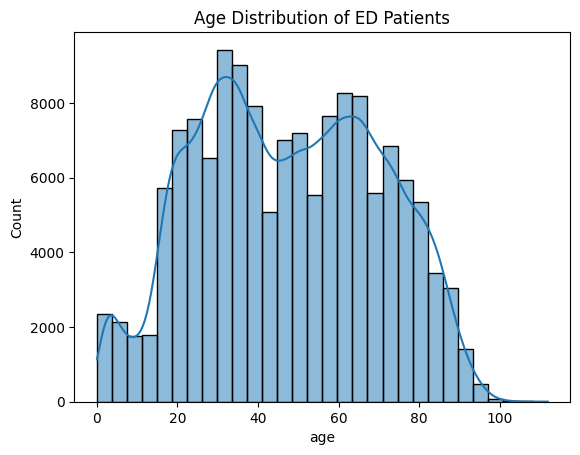

In [30]:
# age distribution 
sns.histplot(df["age"], bins=30, kde=True)
plt.title("Age Distribution of ED Patients")
plt.show()


In [31]:
# gender vs age discharge 
df.groupby("gender")["DischargeFromED"].mean()


gender
0.0    0.496837
1.0    0.507560
Name: DischargeFromED, dtype: float64

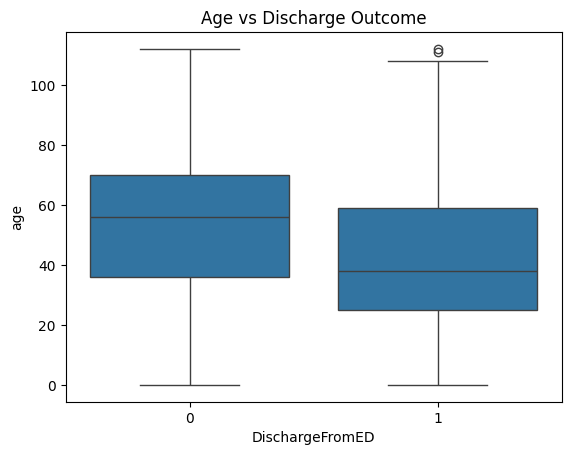

In [32]:
# Age vs Discharge 
sns.boxplot(x="DischargeFromED", y="age", data=df)
plt.title("Age vs Discharge Outcome")
plt.show()


In [33]:
# peak ed Hours 
df.groupby("ResidentDate_hour")["KindRef"].count()


ResidentDate_hour
0     6944
1     5792
2     4459
3     4110
4     2736
5     2138
6     1812
7     2364
8     3217
9     4305
10    5536
11    6652
12    7003
13    6270
14    6590
15    6768
16    7294
17    7828
18    7565
19    9206
20    8283
21    8560
22    8804
23    8393
Name: KindRef, dtype: int64

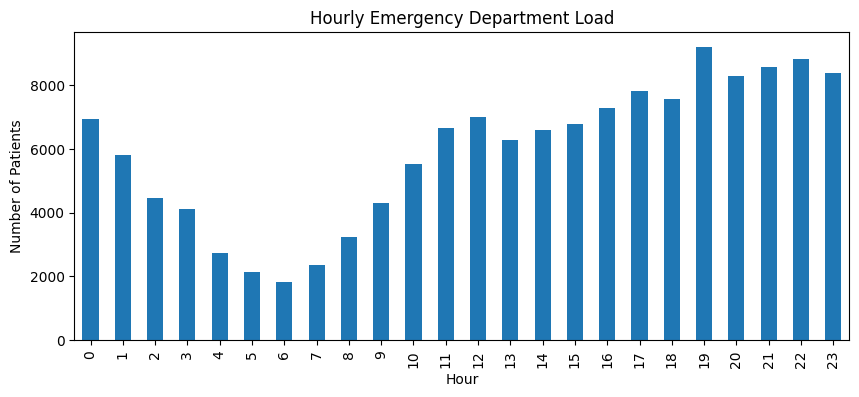

In [34]:
hourly = df.groupby("ResidentDate_hour").size()

hourly.plot(kind="bar", figsize=(10,4))
plt.title("Hourly Emergency Department Load")
plt.xlabel("Hour")
plt.ylabel("Number of Patients")
plt.show()


ED overload hours (usually night / early morning)

🏥 Business Impact

✔ Staff scheduling
✔ Shift optimization


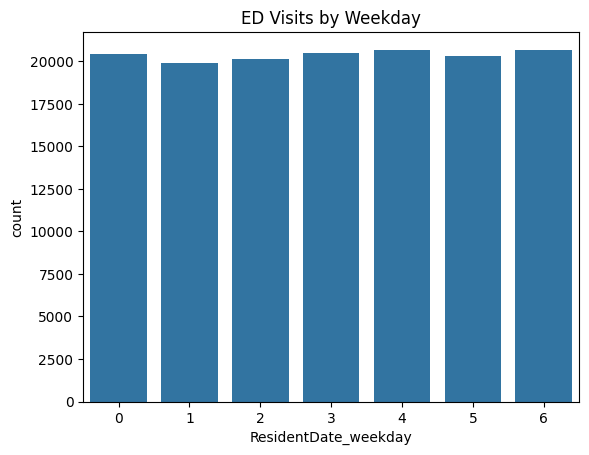

In [35]:
sns.countplot(x="ResidentDate_weekday", data=df)
plt.title("ED Visits by Weekday")
plt.show()


Insight

Higher emergency cases on weekends

🎤 Interview gold:

“Identified temporal patterns in ED congestion.”


In [36]:
df.groupby(pd.cut(df["ResidentDay"], [0,1,3,7,30]))["DischargeFromED"].mean()



ResidentDay
(0, 1]     0.635549
(1, 3]     0.163203
(3, 7]     0.162469
(7, 30]    0.159748
Name: DischargeFromED, dtype: float64

In [37]:
hourly_load = df.groupby("ResidentDate_hour").size().reset_index(name="hourly_patients")

df = df.merge(hourly_load, on="ResidentDate_hour", how="left")


In [38]:
df['hourly_patients']

0         4459
1         4459
2         4459
3         4459
4         4459
          ... 
142624    8393
142625    8393
142626    8393
142627    8393
142628    8393
Name: hourly_patients, Length: 142629, dtype: int64

1. Higher triage severity reduces discharge probability
2. Elderly patients show longer ED stay
3. Peak congestion during evening hours
4. Service utilization strongly correlates with severity


Feature Extraction 

In [39]:
df["DischargeFromED"].value_counts(normalize=True)

DischargeFromED
1    0.503495
0    0.496505
Name: proportion, dtype: float64

Balanced Data 

In [40]:
df["KindRef"].value_counts()

KindRef
3    66946
6    54351
5     8761
4     6650
1     4227
2     1536
7      158
Name: count, dtype: int64

In [41]:
def category_Ref(kind):
    if kind in [1 ,2]:
        return 2 # high risk
    elif kind in [3 ,4]:
        return 1 # medium risk
    else:
        return 0 #low 


In [42]:
df['risk_chance'] = df['KindRef'].apply(category_Ref)

In [43]:
df['risk_chance'].value_counts()

risk_chance
1    73596
0    63270
2     5763
Name: count, dtype: int64

In [44]:
df["age_group"] = pd.cut(
    df["age"],
    bins=[0, 18, 40, 60, 120],
    labels=["Child", "Adult", "Middle_Aged", "Senior"]
)

df["age_group"] = df["age_group"].map(
    {"Child":0, "Adult":1, "Middle_Aged":2, "Senior":3}
)



In [45]:
df["is_peak_hour"] = df["ResidentDate_hour"].apply(
    lambda x: 1 if 18 <= x <= 23 else 0
)


In [46]:
df["is_weekend"] = df["ResidentDate_weekday"].apply(
    lambda x: 1 if x in [5, 6] else 0
)


In [47]:
def has_family(x):
    if x in [1,2,3,4]:
        return 2 # family
    elif x in [5 ,6, 7]:

        
        return 1 # no one
    else:
        return 0 # piloce

In [48]:
df['support'] = df['AccompainerRelation_id'].apply(has_family)

In [49]:
df

,DischargeFromED,Foreigners,gender,age,marital_Status,ResidentDate_weekday,ResidentDate_hour,KindRef,IsGlobal,AccompainerRelation_id,ResidentDay,hourly_patients,risk_chance,age_group,is_peak_hour,is_weekend,support
0,0,0,0.0,75.0,2.0,2,2,5,0.0,2.0,10.0,4459,0,3,0,0,2
1,0,0,1.0,41.0,2.0,2,2,6,0.0,3.0,2.0,4459,0,2,0,0,2
2,0,0,0.0,71.0,2.0,2,2,6,0.0,2.0,0.0,4459,0,3,0,0,2
3,0,0,1.0,77.0,2.0,2,2,6,0.0,2.0,9.0,4459,0,3,0,0,2
4,0,0,1.0,38.0,2.0,2,2,6,0.0,3.0,1.0,4459,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142624,1,0,0.0,56.0,2.0,0,23,3,0.0,3.0,4.0,8393,1,2,1,0,2
142625,1,0,0.0,59.0,2.0,0,23,4,0.0,2.0,1.0,8393,1,2,1,0,2
142626,1,0,0.0,78.0,4.0,0,23,4,0.0,3.0,17.0,8393,1,3,1,0,2
142627,1,0,1.0,69.0,2.0,0,23,4,0.0,2.0,4.0,8393,1,3,1,0,2


In [50]:
df['AccompainerRelation_id'].value_counts()

AccompainerRelation_id
2.0     45417
4.0     21579
3.0     19211
9.0     12992
1.0      9929
6.0      9208
10.0     8038
5.0      7281
7.0      4775
8.0      4199
Name: count, dtype: int64

In [51]:
df.drop(
    columns=[
        "KindRef",
        "age",
        "ResidentDate_hour",
        "ResidentDate_weekday",
        "AccompainerRelation_id",
        "hourly_patients"
        
    ],
    inplace=True
)


In [52]:
df

,DischargeFromED,Foreigners,gender,marital_Status,IsGlobal,ResidentDay,risk_chance,age_group,is_peak_hour,is_weekend,support
0,0,0,0.0,2.0,0.0,10.0,0,3,0,0,2
1,0,0,1.0,2.0,0.0,2.0,0,2,0,0,2
2,0,0,0.0,2.0,0.0,0.0,0,3,0,0,2
3,0,0,1.0,2.0,0.0,9.0,0,3,0,0,2
4,0,0,1.0,2.0,0.0,1.0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
142624,1,0,0.0,2.0,0.0,4.0,1,2,1,0,2
142625,1,0,0.0,2.0,0.0,1.0,1,2,1,0,2
142626,1,0,0.0,4.0,0.0,17.0,1,3,1,0,2
142627,1,0,1.0,2.0,0.0,4.0,1,3,1,0,2


In [53]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 142629 entries, 0 to 142628
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   DischargeFromED  142629 non-null  int64   
 1   Foreigners       142629 non-null  int64   
 2   gender           142629 non-null  float64 
 3   marital_Status   142629 non-null  float64 
 4   IsGlobal         142629 non-null  float64 
 5   ResidentDay      142629 non-null  float64 
 6   risk_chance      142629 non-null  int64   
 7   age_group        142508 non-null  category
 8   is_peak_hour     142629 non-null  int64   
 9   is_weekend       142629 non-null  int64   
 10  support          142629 non-null  int64   
dtypes: category(1), float64(4), int64(6)
memory usage: 11.0 MB


In [54]:
df.isna().sum()


DischargeFromED      0
Foreigners           0
gender               0
marital_Status       0
IsGlobal             0
ResidentDay          0
risk_chance          0
age_group          121
is_peak_hour         0
is_weekend           0
support              0
dtype: int64

In [55]:
df.dropna()

,DischargeFromED,Foreigners,gender,marital_Status,IsGlobal,ResidentDay,risk_chance,age_group,is_peak_hour,is_weekend,support
0,0,0,0.0,2.0,0.0,10.0,0,3,0,0,2
1,0,0,1.0,2.0,0.0,2.0,0,2,0,0,2
2,0,0,0.0,2.0,0.0,0.0,0,3,0,0,2
3,0,0,1.0,2.0,0.0,9.0,0,3,0,0,2
4,0,0,1.0,2.0,0.0,1.0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
142624,1,0,0.0,2.0,0.0,4.0,1,2,1,0,2
142625,1,0,0.0,2.0,0.0,1.0,1,2,1,0,2
142626,1,0,0.0,4.0,0.0,17.0,1,3,1,0,2
142627,1,0,1.0,2.0,0.0,4.0,1,3,1,0,2


In [56]:
df.isna().sum()

DischargeFromED      0
Foreigners           0
gender               0
marital_Status       0
IsGlobal             0
ResidentDay          0
risk_chance          0
age_group          121
is_peak_hour         0
is_weekend           0
support              0
dtype: int64

In [57]:
df.duplicated().sum()

np.int64(127388)

In [58]:
df = df.drop_duplicates()


In [59]:
# reset Index
df.reset_index(drop=True, inplace=True)


In [61]:
df.head()

,DischargeFromED,Foreigners,gender,marital_Status,IsGlobal,ResidentDay,risk_chance,age_group,is_peak_hour,is_weekend,support
0,0,0,0.0,2.0,0.0,10.0,0,3,0,0,2
1,0,0,1.0,2.0,0.0,2.0,0,2,0,0,2
2,0,0,0.0,2.0,0.0,0.0,0,3,0,0,2
3,0,0,1.0,2.0,0.0,9.0,0,3,0,0,2
4,0,0,1.0,2.0,0.0,1.0,0,1,0,0,2


In [63]:
# outliers check and Handle 

num_cols = df.select_dtypes(include=["int64", "float64"]).columns
num_cols


Index(['DischargeFromED', 'Foreigners', 'gender', 'marital_Status', 'IsGlobal',
       'ResidentDay', 'risk_chance', 'is_peak_hour', 'is_weekend', 'support'],
      dtype='str')

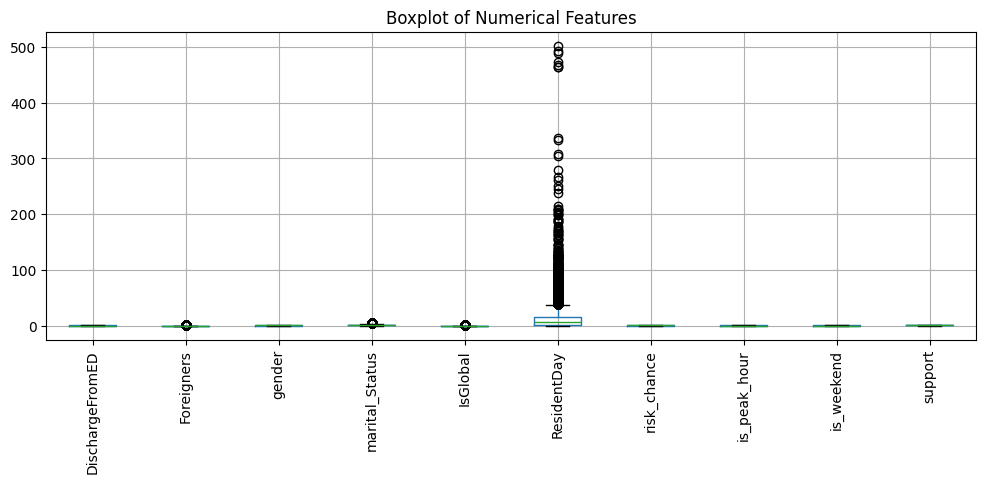

In [64]:
plt.figure(figsize=(12,4))
df[num_cols].boxplot(rot=90)
plt.title("Boxplot of Numerical Features")
plt.show()


In [66]:
def iqr_outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((col < lower) | (col > upper)).sum()


In [67]:
for col in num_cols:
    print(col, iqr_outliers(df[col]))


DischargeFromED 0
Foreigners 2174
gender 0
marital_Status 802
IsGlobal 653
ResidentDay 1157
risk_chance 0
is_peak_hour 0
is_weekend 0
support 0


Why using Only Resident Day ?
Iinitially detected outliers using the IQR method. However, most flagged columns were binary or categorical encodings, so I intentionally avoided treating them as numeric outliers. I only applied capping to continuous features like ResidentDay to preserve data semantics.

In [68]:

df['ResidentDay_log'] = np.log1p(df['ResidentDay'])


In [70]:
df = df.drop(columns=['ResidentDay'])

In [71]:
df

,DischargeFromED,Foreigners,gender,marital_Status,IsGlobal,risk_chance,age_group,is_peak_hour,is_weekend,support,ResidentDay_log
0,0,0,0.0,2.0,0.0,0,3,0,0,2,2.397895
1,0,0,1.0,2.0,0.0,0,2,0,0,2,1.098612
2,0,0,0.0,2.0,0.0,0,3,0,0,2,0.000000
3,0,0,1.0,2.0,0.0,0,3,0,0,2,2.302585
4,0,0,1.0,2.0,0.0,0,1,0,0,2,0.693147
...,...,...,...,...,...,...,...,...,...,...,...
15236,1,0,0.0,1.0,0.0,1,0,0,0,2,2.397895
15237,1,1,0.0,2.0,0.0,1,2,0,0,2,2.397895
15238,1,0,0.0,2.0,0.0,1,2,0,0,2,3.218876
15239,1,1,1.0,1.0,0.0,0,0,1,0,2,1.609438


In [73]:
data = df.to_csv("data/cleandata.csv", index=False)